In [1]:
from utils.util import *

## Change this string to '5sec' if you want to train a new model that uses all 5 seconds of raw data
## Change this string to '1sec' if you want to train a new model that uses 1 second slices of raw data

In [2]:
train_width = '1sec'

## This is NOT the raw data. It is each file summarized down into a single row if using the '5sec' model, or 5 rows if using the '1sec' model

In [3]:
df = pd.read_csv(f'../data/complex_mafaulda_{train_width}.csv')
df.head()

,axialUnderhang-Entropy,axialUnderhang-Kurtosis,axialUnderhang-Mean,axialUnderhang-F,axialUnderhang-2F,axialUnderhang-3F,axialOverhang-Entropy,axialOverhang-Kurtosis,axialOverhang-Mean,axialOverhang-F,...,microphone-F,microphone-2F,microphone-3F,tachometerSignal-Entropy,tachometerSignal-Kurtosis,tachometerSignal-Mean,fundamentalFrequency,class,path,startPoint
0,10.633214,0.004950,0.009842,0.156278,0.101619,0.122819,10.463767,-0.110942,-0.009464,0.020566,...,0.022078,0.008598,0.021983,9.656114,1.898132,0.004390,61.00000,vertical-misalignment,full/vertical-misalignment/1.78mm/62.0544.csv,200000.0
1,10.628957,0.194001,0.008607,0.162711,0.167297,0.163898,10.505807,0.407069,0.017773,0.023624,...,0.021764,0.009035,0.021343,9.658679,2.001966,-0.006402,60.99878,vertical-misalignment,full/vertical-misalignment/1.78mm/62.0544.csv,150000.0
2,10.624347,-0.220687,0.009522,0.159777,0.133762,0.045357,10.473719,-0.221713,-0.000486,0.010891,...,0.021401,0.008802,0.020001,9.643273,1.864986,0.004954,60.99878,vertical-misalignment,full/vertical-misalignment/1.78mm/62.0544.csv,100000.0
3,10.620357,-0.254865,0.009031,0.162775,0.093203,0.075060,10.451755,-0.086090,-0.012446,0.016143,...,0.022151,0.010173,0.021473,9.649679,1.952311,-0.007070,60.99878,vertical-misalignment,full/vertical-misalignment/1.78mm/62.0544.csv,50000.0
4,10.631042,-0.154502,0.008411,0.168113,0.088672,0.106329,10.447604,-0.386185,0.026383,0.015667,...,0.022520,0.009568,0.022267,9.644393,1.889186,0.006114,60.99878,vertical-misalignment,full/vertical-misalignment/1.78mm/62.0544.csv,0.0


In [4]:
# make our class dictionary
keys = list(np.unique(df['class']))
codes = [int(_) for _ in np.arange(0,len(keys))]
classDict = dict(zip(keys,codes))
classDict['mixed'] = 6

df['CLASS'] = df['class']
df['class'] = df['class'].map(classDict)

classDict

{'horizontal-misalignment': 0,
 'imbalance': 1,
 'normal': 2,
 'overhang': 3,
 'underhang': 4,
 'vertical-misalignment': 5,
 'mixed': 6}

In [5]:
X = df.drop(columns=['class','path','CLASS'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=45,
                                                    stratify=None)

print(f'Length of train set: {len(X_train)}')
print(f'Length of test set: {len(X_test)}')

Length of train set: 7804
Length of test set: 1951


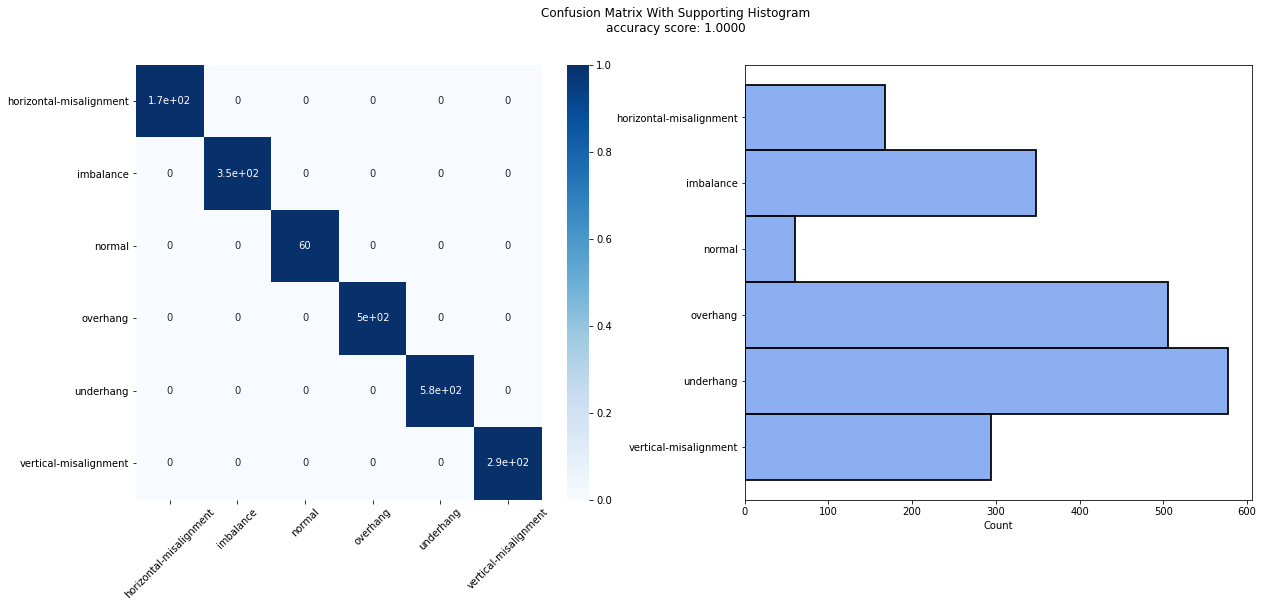

In [6]:
# used by the confusion_hist_plot function
target = 'class'

# define the model
model = RandomForestClassifier()

# train the model
model.fit(X_train, y_train)

# try to predict the data points we set aside for testing
preds = model.predict(X_test)

#plot our results
confusion_hist_plot(df=df,y_test=y_test,preds=preds,codes=classDict);

# save the model
joblib.dump(model, f'./models/rfc_{train_width}.joblib')

In [7]:
# These indices tell us which files we will need to pull from to re-summarize subsamples of the data for
# our sliding window
idxs = X_test.index
idxs = [int(_) for _ in idxs]

val_files = df[['path','class','CLASS']].iloc[idxs]
val_files.head()
val_files.to_csv(f'./utils/test_files_{train_width}.csv')

,path,class,CLASS
1310,full/vertical-misalignment/1.27mm/50.3808.csv,5,vertical-misalignment
5157,full/imbalance/25g/30.1056.csv,1,imbalance
8280,full/overhang/outer_race/0g/29.696.csv,3,overhang
684,full/vertical-misalignment/0.51mm/26.624.csv,5,vertical-misalignment
8768,full/overhang/outer_race/20g/22.9376.csv,3,overhang
